In [1]:
import glob

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xclim as xc
import cftime

from unseen import array_handling

## AGCD

In [7]:
infiles = sorted(glob.glob('/g/data/zv2/agcd/v1-0-3/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_*.nc'))

In [9]:
ds = xr.open_mfdataset(infiles)
ds = ds.sel({'lat': -34.92, 'lon': 138.62}, method='nearest')
ds = ds.compute()

In [27]:
tx90 = xc.core.calendar.percentile_doy(
    ds['tmax'].sel(time=slice('1950-01-01', '2014-12-31')),
    window=5,
    per=90
)

In [28]:
tx90 = tx90.compute()
tx90 = tx90.sel(percentiles=90)

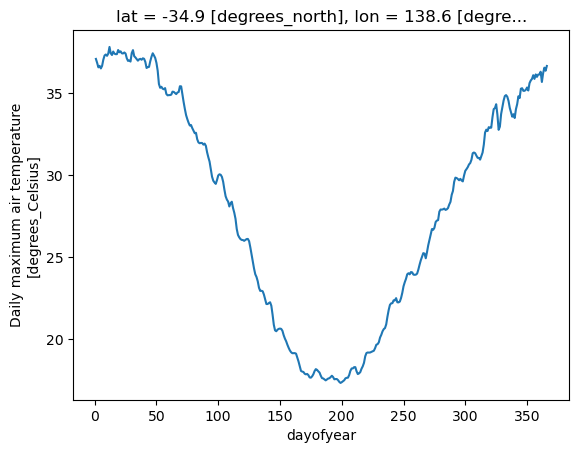

In [29]:
tx90.plot()

In [8]:
wsdi = xc.indicators.icclim.WSDI(
    tasmax=ds['tmax'],
    tasmax_per=tx90,
    freq='YS',
)   

In [9]:
wsdi

<xarray.DataArray 'WSDI' (time: 115)> Size: 920B
array([ 0.,  8.,  0.,  6., 14.,  0.,  0.,  0.,  8.,  0.,  0., 15.,  0.,
        0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  7.,  0.,  0.,  8.,  0.,
        9.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  6.,  0.,  0., 15.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0., 17.,  0.,  0.,
        0.,  0.,  6.,  0.,  0., 15.,  8.,  0.,  0.,  6.,  0.,  0.,  6.,
        0.,  7.,  0.,  0.,  7.,  0.,  0., 13., 15.,  0.,  7.,  0.,  0.,
        9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.])
Coordinates:
    lat          float32 4B -34.9
    lon          float32 4B 138.6
    percentiles  int64 8B 90
  * time         (time) datetime64[ns] 920B 1910-01-01 1911-01-01 ... 2024-01-01
Attributes:
    units:          days
    cell_methods:   tasmax: time: maximum tasmax_per: time: maximum time: sum...
    history:        tasmax: \ntasmax_per: [2025-09-16 16:14:32] per: percenti...
    long_name:      Warm-spell duration index
    standard_name:  number_of_days_with_air_temperature_above_threshold
    description:    Annual number of days with at least 6 consecutive days wh...

In [10]:
wsdi_series = wsdi.to_series()
wsdi_series.index = wsdi_series.index.year

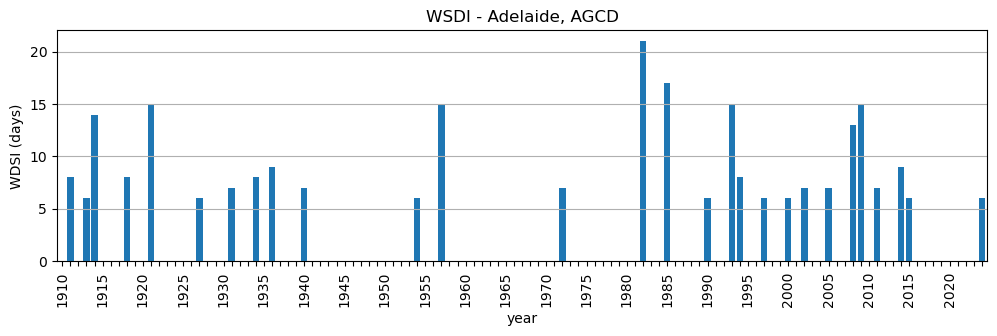

In [11]:
ax = wsdi_series.plot.bar(figsize=[12, 3], width=0.8)
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, AGCD')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()

## CORDEX

In [61]:
hist_files = sorted(glob.glob('/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/historical/r4i1p1f1/BARPA-R/v1-r1/day/tasmax/latest/tasmax_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_day_*.nc'))

In [63]:
ssp370_files = sorted(glob.glob('/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/ssp370/r4i1p1f1/BARPA-R/v1-r1/day/tasmax/latest/tasmax_AUS-15_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_day_*.nc'))

In [64]:
cordex_files = hist_files + ssp370_files

In [65]:
ds_cordex = xr.open_mfdataset(cordex_files)
ds_cordex = ds_cordex.sel({'lat': -34.92, 'lon': 138.62}, method='nearest')
ds_cordex = ds_cordex.compute()
ds_cordex['tasmax'] = xc.core.units.convert_units_to(ds_cordex['tasmax'], 'degC')

/jobfs/149701454.gadi-pbs/ipykernel_250587/1814103595.py:1: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_cordex = xr.open_mfdataset(cordex_files)


In [72]:
tx90_cordex = xc.core.calendar.percentile_doy(
    ds_cordex['tasmax'].sel(time=slice('1950-01-01', '2014-12-31')),
    window=5,
    per=90
)
tx90_cordex = tx90_cordex.compute()
tx90_cordex = tx90_cordex.sel(percentiles=90)

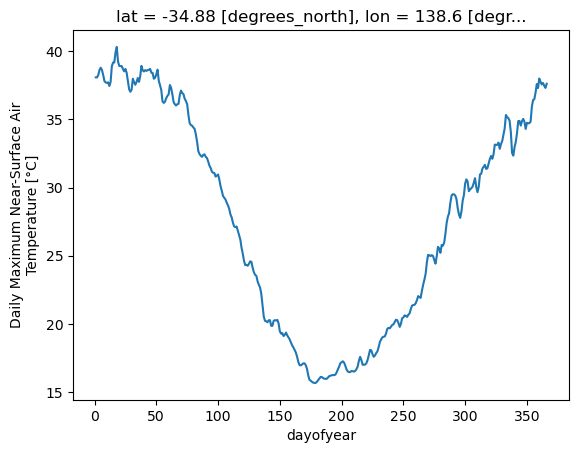

In [73]:
tx90_cordex.plot()

In [74]:
wsdi_cordex = xc.indicators.icclim.WSDI(
    tasmax=ds_cordex['tasmax'],
    tasmax_per=tx90_cordex,
    freq='YS',
)   

In [75]:
wsdi_cordex_series = wsdi_cordex.to_series()
wsdi_cordex_series.index = wsdi_cordex_series.index.year

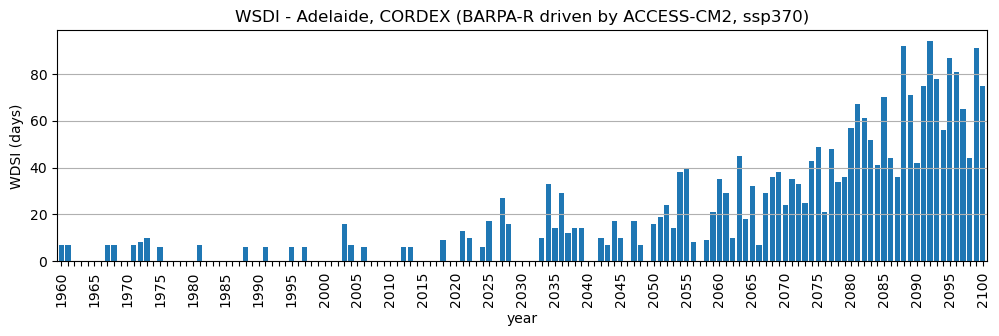

In [78]:
ax = wsdi_cordex_series.plot.bar(figsize=[12, 3], width=0.8)
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, CORDEX (BARPA-R driven by ACCESS-CM2, ssp370)')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()

## DCPP

In [148]:
dcpp_file = '/g/data/xv83/dbi599/treasury/tasmax_day_CMCC-CM2-SR5_dcppA-hindcast_adelaide_19601101-20291231.nc'

In [149]:
ds_dcpp = xr.open_mfdataset(dcpp_file)
ds_dcpp = ds_dcpp.compute()

In [150]:
ds_dcpp

<xarray.Dataset> Size: 20MB
Dimensions:    (init_date: 60, ensemble: 20, lead_time: 3711)
Coordinates:
  * ensemble   (ensemble) int64 160B 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18 19
  * lead_time  (lead_time) int64 30kB 0 1 2 3 4 5 ... 3706 3707 3708 3709 3710
  * init_date  (init_date) object 480B 1960-11-01 00:00:00 ... 2019-11-01 00:...
    time       (lead_time, init_date) object 2MB 1960-11-01 12:00:00 ... 2029...
Data variables:
    tasmax     (init_date, ensemble, lead_time) float32 18MB 20.82 23.3 ... 16.8
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-CM2-SR5 output prepared for CMIP6
    variable_id:            tasmax
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/8bd4fa00-1bf2-4110-82b8-dc57c9b42e2e

In [151]:
60 * 20 * 3711

4453200

In [152]:
#ds_dcpp = array_handling.reindex_forecast(ds_dcpp)
#ds_dcpp = ds_dcpp.sel(time=slice('1950-01-01', '2014-12-31'))
#ds_dcpp

In [153]:
ds_dcpp['init_date'] = np.arange(0, len(ds_dcpp['init_date']))

In [154]:
df = ds_dcpp['tasmax'].to_dataframe()
df = df.reset_index()
df = df.dropna()

In [155]:
df

,init_date,ensemble,lead_time,time,tasmax
0,0,0,0,1960-11-01 12:00:00,20.821747
1,0,0,1,1960-11-02 12:00:00,23.299591
2,0,0,2,1960-11-03 12:00:00,16.688232
3,0,0,3,1960-11-04 12:00:00,16.188080
4,0,0,4,1960-11-05 12:00:00,17.889465
...,...,...,...,...,...
4453195,59,19,3706,2029-12-27 12:00:00,18.517731
4453196,59,19,3707,2029-12-28 12:00:00,18.446259
4453197,59,19,3708,2029-12-29 12:00:00,17.308075
4453198,59,19,3709,2029-12-30 12:00:00,16.814301


In [158]:
df = df[df['time'] < cftime._cftime.DatetimeNoLeap(2015, 1, 1)]
df

,init_date,ensemble,lead_time,time,tasmax
0,0,0,0,1960-11-01 12:00:00,20.821747
1,0,0,1,1960-11-02 12:00:00,23.299591
2,0,0,2,1960-11-03 12:00:00,16.688232
3,0,0,3,1960-11-04 12:00:00,16.188080
4,0,0,4,1960-11-05 12:00:00,17.889465
...,...,...,...,...,...
4078445,54,19,56,2014-12-27 12:00:00,16.658417
4078446,54,19,57,2014-12-28 12:00:00,21.096954
4078447,54,19,58,2014-12-29 12:00:00,20.990021
4078448,54,19,59,2014-12-30 12:00:00,19.507050


In [159]:
def adjust_year(row):
    ensemble_num = row['ensemble']
    init_num = row['init_date']
    lead_year = row['lead_time'] / 365
    new_year = ensemble_num*1000 + init_num*14 + lead_year
    orig_time = row['time']
    orig_month = orig_time.month
    orig_day = orig_time.day
    new_time = cftime._cftime.DatetimeNoLeap(new_year, orig_month, orig_day)

    return new_time

In [160]:
df['time'] = df.apply(adjust_year, axis=1)

/jobfs/149860725.gadi-pbs/ipykernel_2477994/549697402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df.apply(adjust_year, axis=1)


In [161]:
df['time'].unique()

array([cftime.DatetimeNoLeap(0, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(0, 11, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(0, 11, 3, 0, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(19756, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(19756, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(19756, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      shape=(3680600,), dtype=object)

In [162]:
df = df.drop(['lead_time', 'init_date', 'ensemble'], axis=1)
df = df.sort_values(by='time')
df = df.set_index('time')

In [163]:
ds_dcpp_flattened = df.to_xarray()
ds_dcpp_flattened = ds_dcpp_flattened.compute()

In [164]:
ds_dcpp_flattened['tasmax']

<xarray.DataArray 'tasmax' (time: 3680600)> Size: 15MB
array([28.990051, 23.869446, 18.518097, ..., 20.99002 , 19.50705 ,
       19.78769 ], shape=(3680600,), dtype=float32)
Coordinates:
  * time     (time) object 29MB 0000-01-01 00:00:00 ... 19756-12-31 00:00:00

In [165]:
tx90_dcpp = xc.core.calendar.percentile_doy(
    ds_dcpp_flattened['tasmax'],
    window=5,
    per=90
)
tx90_dcpp = tx90_dcpp.compute()
tx90_dcpp = tx90_dcpp.sel(percentiles=90)

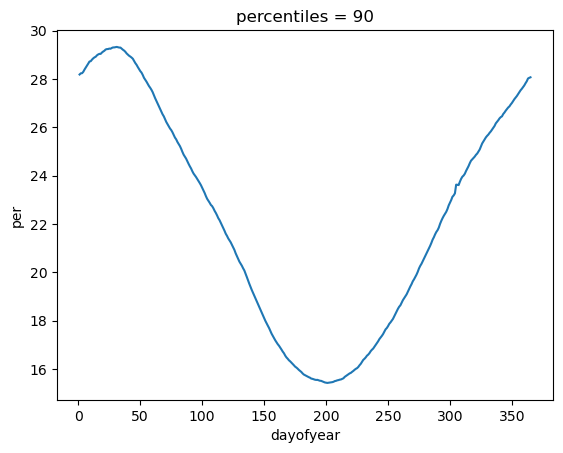

In [166]:
tx90_dcpp.plot()